In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

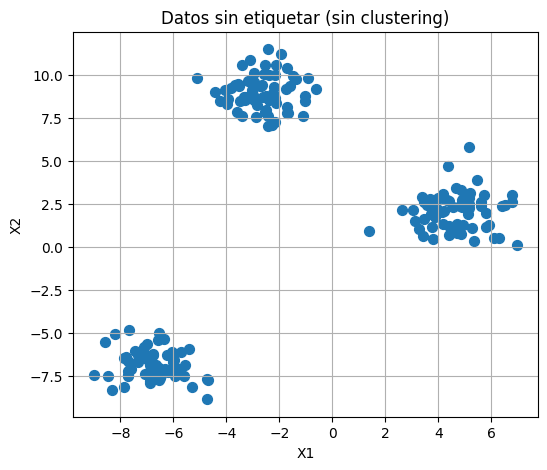

In [4]:
# Paso 2: Crear un dataset simple de 2D con 3 clústeres
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

# Paso 3: Visualizar los datos antes del clustering
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos sin etiquetar (sin clustering)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()




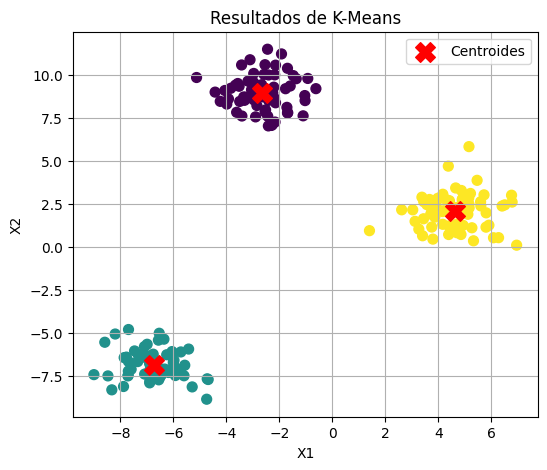

In [5]:
# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Paso 5: Visualizar los resultados del clustering
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroides')
plt.title("Resultados de K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

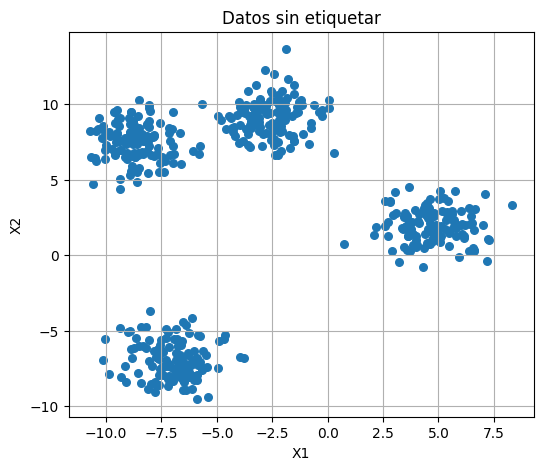

In [7]:
# Paso 1: Crear un dataset con ruido y 4 centros reales
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Paso 2: Visualizar los datos sin etiquetas
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Datos sin etiquetar")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

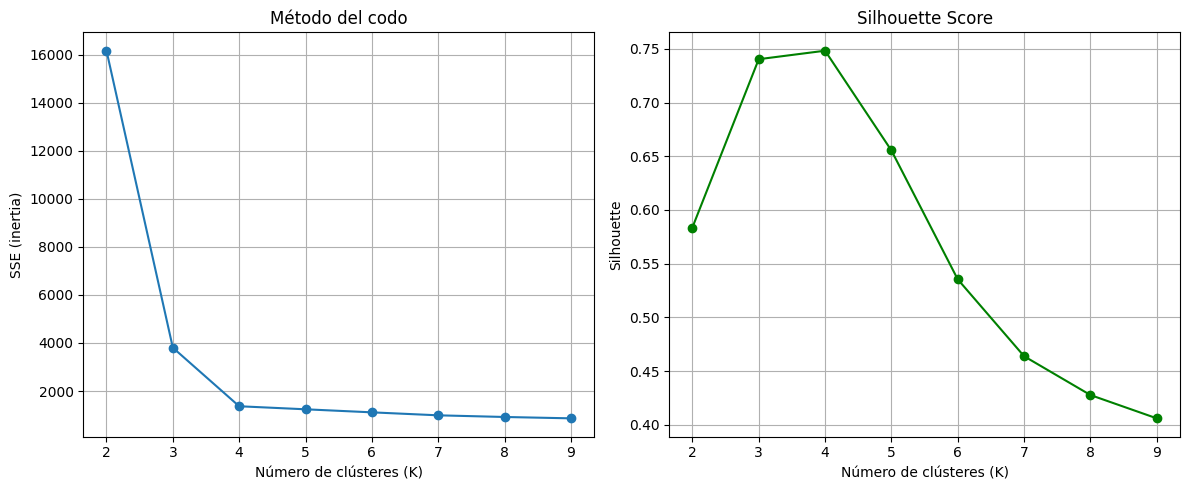

In [8]:
# Paso 3: Probar distintos valores de K y calcular SSE (inertia) y Silhouette
sse = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Paso 4: Visualizar el método del codo y el índice de Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clústeres (K)")
plt.ylabel("SSE (inertia)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clústeres (K)")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

Mejor número de clústeres según Silhouette: 4


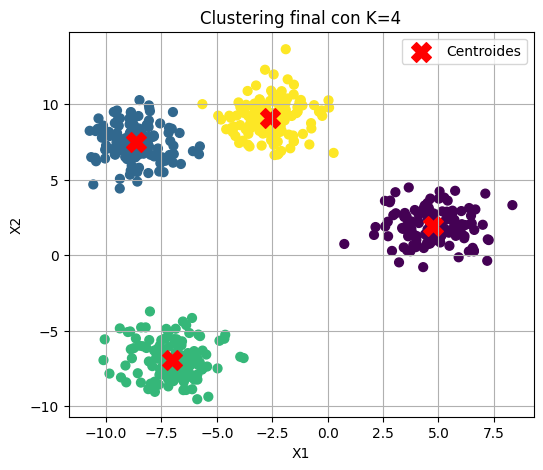

In [9]:
# Paso 5: Elegir el mejor K (por ejemplo, el de Silhouette más alto)
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Mejor número de clústeres según Silhouette: {best_k}")

# Paso 6: Aplicar KMeans con el K óptimo y visualizar
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans_final.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroides')
plt.title(f"Clustering final con K={best_k}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()
